In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [27]:
from sklearn.datasets import make_blobs

In [28]:
data = make_blobs(n_samples=300, #rows
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=101)

In [29]:
X,y =  data

In [30]:
np.random.seed(101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [31]:
features = pd.DataFrame(X)

In [32]:
features = pd.concat([features, z_noise],axis=1)

In [33]:
features.columns = ['x1', 'x2', 'x3']

In [34]:
features

,x1,x2,x3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


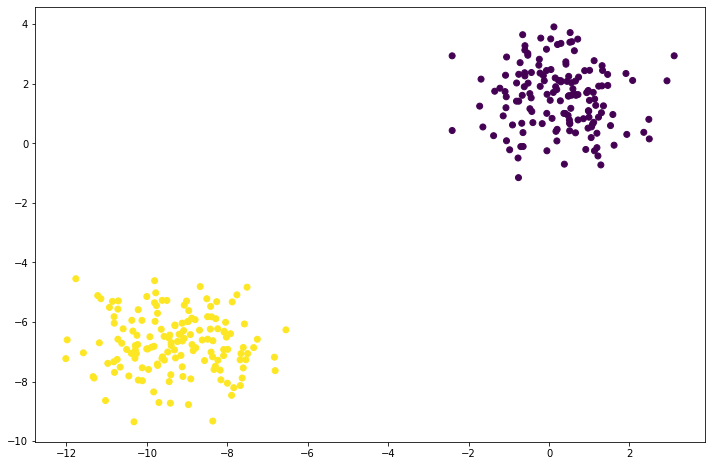

In [35]:
plt.scatter(features['x1'], features['x2'], c=y)

In [36]:
from mpl_toolkits.mplot3d import Axes3D

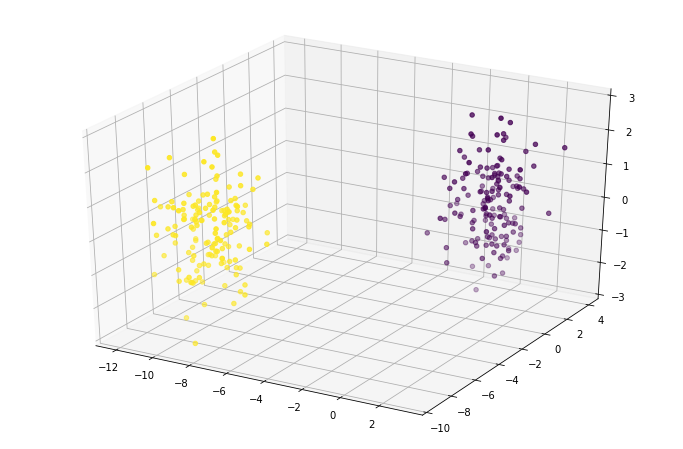

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['x1'], features['x2'], features['x3'], c=y)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
from tensorflow.keras.optimizers import SGD

In [40]:
# 3----- -> 2--------- ->3

In [41]:
encoder = Sequential([
    Dense(2,activation='relu',input_shape=[3])
])

In [42]:
decoder = Sequential([
    Dense(3, activation='relu', input_shape=[2])
])

In [43]:
autoencoder = Sequential([encoder, decoder])

In [44]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
scaledData = scaler.fit_transform(features)

In [47]:
autoencoder.fit(scaledData, scaledData, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 0.1882
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1702
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.2479


In [48]:
encoded_2dim = encoder.predict(scaledData)

In [49]:
encoded_2dim.shape

(300, 2)

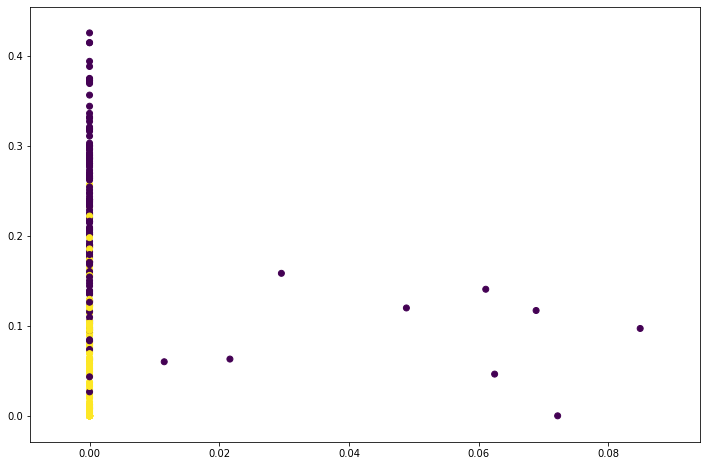

In [50]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)